<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/03%20-%20Pandas%20and%20Data%20Cleaning/Walkthrough/Solution_Introduction_to_EDA2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a class="anchor"></a> 1. Exploratory Data Analysis





Now lets get into the Data Analysis per say. This part will extensively rely on the Pandas Dataframes, and functions. Please do not hesitate to refer to last sessions introduction if you don't feel yet comfortable. Throughout this part, you will learn more about the dtypes of data you can find in data frame and manipulate its columns for analysis purposes.

## <a class="anchor"></a> 1.1. Loading and getting a first look at our Data


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

sns.set_style('darkgrid')

The dataset we will use is available under the following url :`'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv'`. This dataset containts the results of restaurant inspections in NYC.

In [2]:
# Load data into a DataFrame
restaurants = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv')

# Print the first 10 rows of the DataFrame
restaurants.head(10)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50160860,BED-VYNE BREW,Brooklyn,370,TOMPKINS AVENUE,11216.0,3472952218,NaN,01/01/1900,NaN,...,NaN,40.684808,-73.944217,303.0,36.0,26700.0,3051686.0,3.018240e+09,BK75,NaN
1,50160153,Idaho,Manhattan,349,EAST 13 STREET,10003.0,3233502345,NaN,01/01/1900,NaN,...,NaN,40.731163,-73.984268,103.0,2.0,4000.0,1006530.0,1.004550e+09,MN22,NaN
2,50160484,BAOBAO SLIDER,Manhattan,W,59TH STREET COLUMBUS CIRCLE,10023.0,6466372137,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50147778,PICCOLO CUCINA CASA,Brooklyn,141,NEVINS STREET,11217.0,9292950015,NaN,01/01/1900,NaN,...,NaN,40.684310,-73.983847,302.0,33.0,3900.0,3332449.0,3.001970e+09,BK38,NaN
4,50155703,JUST SALAD,Manhattan,300,PARK AVENUE,10022.0,7323004245,NaN,01/01/1900,NaN,...,NaN,40.756795,-73.974271,105.0,4.0,10200.0,1081146.0,1.012850e+09,MN17,NaN
5,50107121,JUICE CHICKEN,Brooklyn,7021,3 AVENUE,11209.0,9173539102,NaN,01/01/1900,NaN,...,NaN,40.634367,-74.026589,310.0,47.0,6800.0,3146522.0,3.058910e+09,BK31,NaN
6,50122024,STATEN ISLAND FERRY HAWKS,Staten Island,75,RICHMOND TERRACE,10301.0,9172843261,NaN,01/01/1900,NaN,...,NaN,40.644667,-74.077002,501.0,49.0,700.0,5157467.0,5.000020e+09,SI22,NaN
7,50158586,FRUITTI YUMMI QUEENS INC.,Queens,8001,37TH AVE,11372.0,9178826880,NaN,01/01/1900,NaN,...,NaN,40.749569,-73.886030,403.0,25.0,28300.0,4029676.0,4.012800e+09,QN28,NaN
8,50161990,"RAISING CANE'S RESTAURANTS, L.L.C.",Queens,15929,JAMAICA AVE,11432.0,9727693100,NaN,01/01/1900,NaN,...,NaN,40.703485,-73.799838,412.0,24.0,44601.0,4208839.0,4.097560e+09,QN61,NaN
9,50159857,PK UWS LLC,Manhattan,433,AMSTERDAM AVENUE,10024.0,2038156544,NaN,01/01/1900,NaN,...,NaN,40.784227,-73.977521,107.0,6.0,16500.0,1031999.0,1.012110e+09,MN12,NaN


In [3]:
#restaurants.shape[0]
len(restaurants)

270492

Let's use the `.describe()` function to get a quick overview of the data we will be working with.


In [4]:
restaurants.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.704920e+05,267708.000000,256248.000000,270142.000000,270142.000000,267137.000000,267156.000000,267156.000000,2.658120e+05,2.699180e+05,0.0
mean,4.776574e+07,10707.196546,24.003945,40.307668,-73.180476,254.757855,20.809609,29791.981228,2.579666e+06,2.473724e+09,NaN
std,3.925248e+06,593.644252,18.054395,4.111492,7.463970,129.968876,15.808869,31189.769473,1.347208e+06,1.333183e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.170118e+07,10023.000000,12.000000,40.683995,-73.989079,106.000000,4.000000,8000.000000,1.051514e+06,1.011158e+09,NaN
50%,5.007764e+07,11101.000000,20.000000,40.730496,-73.957087,302.000000,20.000000,17200.000000,3.021291e+06,3.007940e+09,NaN
75%,5.011715e+07,11231.000000,32.000000,40.761007,-73.896421,401.000000,34.000000,42300.000000,4.008030e+06,4.005480e+09,NaN
max,5.016520e+07,14057.000000,168.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


## <a class="anchor"></a> 1.2. Dtypes and descriptive statistics

Recall from week 2 that there are different dtypes in Pandas. Have a look at this table once again:


| Pandas dtype  | Python type  | NumPy type|Usage
| :--- | :--- | :--- | :--- |
| object| str or mixed | string_, unicode_, mixed types| Text or mixed numeric and non_numeric values |
| int 64| int| int_, int8, int16, int32, int64, uint8, uint18, uint32, uint64 | Integer numbers i.e. [1,2,3,...] |
| float64| float| float_, float15, float32, float64 | Floating point numbers (They contain decimal points) |
| bool| bool|bool_| True/False values|
| datetime64 | NA | datetime64[ns]     | Date and time values  |
| timedelta[ns] | NA  | NA| Differences between two datetime|
| category | NA| NA| Finite list of text values|


Now let's see what the dtypes of our DF are:


In [5]:
restaurants.dtypes

,0
CAMIS,int64
DBA,object
BORO,object
BUILDING,object
STREET,object
ZIPCODE,float64
PHONE,object
CUISINE DESCRIPTION,object
INSPECTION DATE,object
ACTION,object


In order to understand the data you are looking at, it is important to understand the signification of the columns. If you have some doubts, don't hesitate to look at it on the internet or ask chatgpt. In this data frame for example, CAMIS is the key field used to identify each specific establishment. DBA stands for "Doing Business As" and BORO refers to the borough in which the establishment is located. (Manhattan, Brooklyn, Queens, The Bronx, and Staten Island)

### <a class="anchor"></a> 1.2.1 Descriptive Statistics for numerical variables

As you can see, the DataFrame comprises different types of Data. You always have to pay attention to this, as the supported operations depends on it. For instance, float64 is a desired type for decimal data, especially if we want to see statistics, distribution etc...


In [6]:
#Describe the SCORE column
restaurants.SCORE.describe()

,SCORE
count,256248.000000
mean,24.003945
std,18.054395
min,0.000000
25%,12.000000
50%,20.000000
75%,32.000000
max,168.000000


We can use the `.hist()` function to plot an histogram and analyze data distribution.

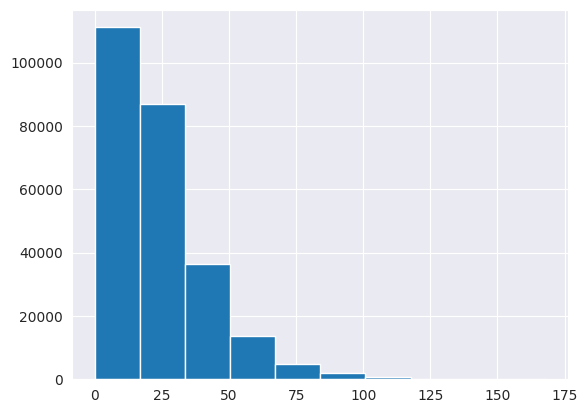

In [7]:
hist_score=restaurants["SCORE"].hist()

Granularity is important for distribution analysis and precision. It can be changed by varying the number if bins used for display.  The `hist()` function allows to pass multiple arguments, you can find more information if you follow this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)


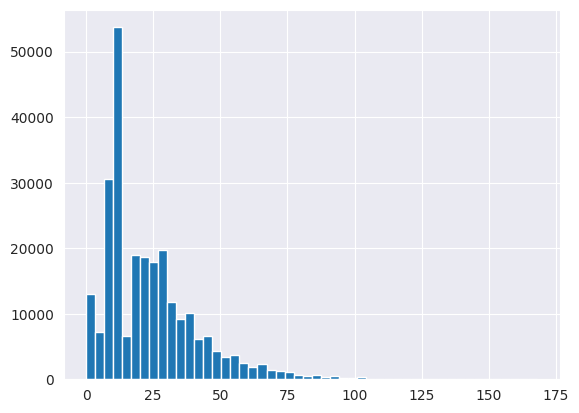

In [8]:
hist_score_2=restaurants["SCORE"].hist(bins = 50)

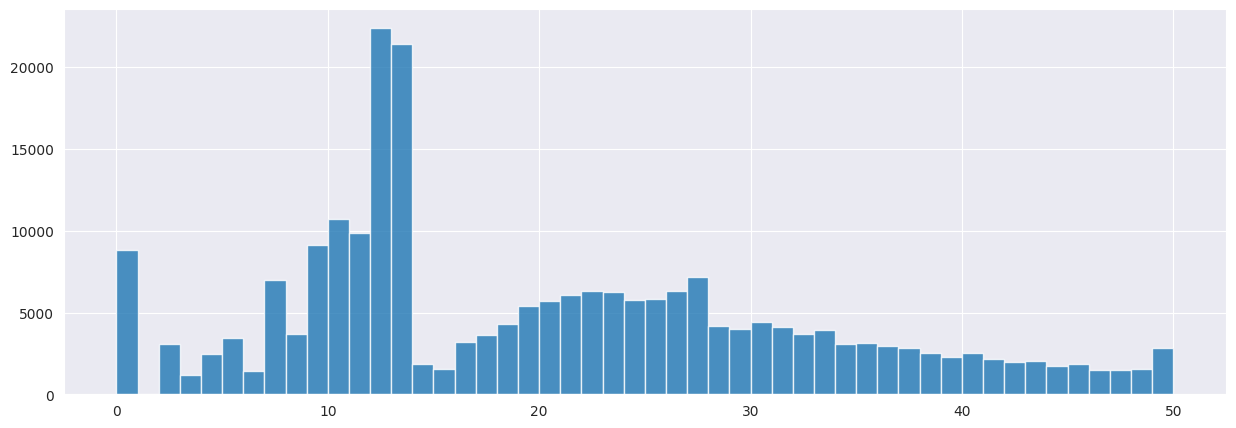

In [9]:
# A quick exposure to various options of the "hist" command
hist_score_3=restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

We now have some statistical information for the SCORE column. Let's convert some other columns to a more useful type.

### <a class="anchor"></a> 1.2.2 Descriptive statistics for DATETIME variables


Remember that one of the dtypes handles Date and Time. Some of the columns in our DF contain this type of data, so let's convert these columns to the `datetime64` dtype so that we can further processings, statistics and distribution analysis for example.


In [10]:
restaurants["GRADE DATE"].sample(10)

,GRADE DATE
160773,08/28/2024
217913,NaN
134624,05/01/2024
18003,NaN
200716,04/03/2024
135377,12/02/2022
191470,01/13/2025
66538,NaN
18181,NaN
13619,11/09/2022


For that, we need to understand first how to parse dates using the [Python conventions.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

The relevant entries from the table are:

    %m Month as a zero-padded decimal number. (01,02...)
    %d Day of the month as a zero-padded decimal number. (01,02,..)
    %Y Year with century as a decimal number. (2001,2002,...)

Now that we know in what format the dates were entried (remember that americans write dates like this `month/day/year` , as opposed to `day/month/year`), we can convert our columns.

In [11]:
#We convert some columns to the datetime64 type
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y",errors='coerce')
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y",errors='coerce')
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y",errors='coerce')

#Now we have another look at the dtaypes
restaurants.dtypes

,0
CAMIS,int64
DBA,object
BORO,object
BUILDING,object
STREET,object
ZIPCODE,float64
PHONE,object
CUISINE DESCRIPTION,object
INSPECTION DATE,datetime64[ns]
ACTION,object


Let's see what the `.describe()` function can do now.

In [12]:
restaurants['GRADE DATE']

,GRADE DATE
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
...,...
270487,NaT
270488,2025-01-02
270489,NaT
270490,NaT


In [13]:
#restaurants['GRADE DATE'].describe(datetime_is_numeric=True)
restaurants[['GRADE DATE','INSPECTION DATE', 'RECORD DATE']].describe()

,GRADE DATE,INSPECTION DATE,RECORD DATE
count,123656,270492,270492
mean,2023-07-09 22:16:38.926053376,2021-11-04 16:16:27.320882176,2025-02-11 00:00:00
min,2015-09-24 00:00:00,1900-01-01 00:00:00,2025-02-11 00:00:00
25%,2022-10-14 00:00:00,2022-09-01 00:00:00,2025-02-11 00:00:00
50%,2023-07-28 00:00:00,2023-06-29 00:00:00,2025-02-11 00:00:00
75%,2024-06-13 00:00:00,2024-06-05 00:00:00,2025-02-11 00:00:00
max,2025-02-10 00:00:00,2025-02-10 00:00:00,2025-02-11 00:00:00


Or, we can do it manually:

In [14]:
restaurants[["INSPECTION DATE", "RECORD DATE", "GRADE DATE"]].agg(
    ["min", "max", "mean", "std", "count"]
)


,INSPECTION DATE,RECORD DATE,GRADE DATE
min,1900-01-01 00:00:00,2025-02-11 00:00:00,2015-09-24 00:00:00
max,2025-02-10 00:00:00,2025-02-11 00:00:00,2025-02-10 00:00:00
mean,2021-11-04 16:16:27.320882176,2025-02-11 00:00:00,2023-07-09 22:16:38.926053376
std,5197 days 19:37:55.586698880,0 days 00:00:00,420 days 15:06:07.745506464
count,270492,270492,123656


We can also plot an histogram for datetime variables:

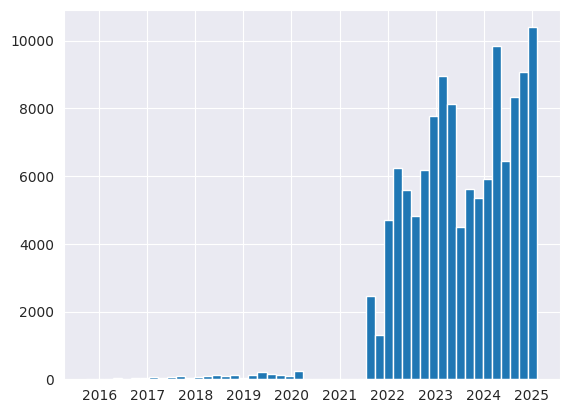

In [15]:
hist_date=restaurants["GRADE DATE"].hist(bins=50)

### <a class="anchor"></a> 1.2.3 Descriptive statistics for categorical variables

Now let's handle categorical data. This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

We can use the pandas `.Categorical` function for this.

In [16]:
#We convert the categorical columns
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True) #Order important
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

#We have another look at the dtypes
restaurants.dtypes

,0
CAMIS,int64
DBA,object
BORO,category
BUILDING,object
STREET,object
ZIPCODE,float64
PHONE,object
CUISINE DESCRIPTION,category
INSPECTION DATE,datetime64[ns]
ACTION,category


In [17]:
restaurants.GRADE.value_counts()

,count
GRADE,
A,90817
B,15524
C,9929


In [18]:
restaurants['GRADE'].value_counts()

,count
GRADE,
A,90817
B,15524
C,9929


In [19]:
#Display 10 first entries
restaurants["DBA"].value_counts()[:10]

,count
DBA,
DUNKIN,3285
SUBWAY,2006
STARBUCKS,1573
MCDONALD'S,1391
POPEYES,1006
DUNKIN',780
BURGER KING,767
KENNEDY FRIED CHICKEN,684
CHIPOTLE MEXICAN GRILL,661


An explanation:
 * The `value_counts()` function counts how many different values there are.
 * The `[:10]` filters the list, thus showing us only the first 10 values.  




In [20]:
#Display 5 first entries
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].to_frame() #converted into a dataframe

,count
CUISINE DESCRIPTION,
American,43149
Chinese,26118
Coffee/Tea,18701
Pizza,16504
Latin American,11311


We can also plot the data, lets start by plotting the different categories of food with the `.plot()` function.

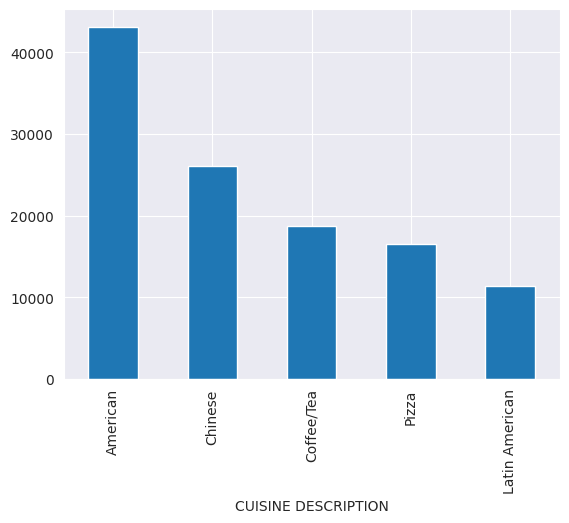

In [21]:
hist_cuisine=restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [22]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts().to_frame().rename(columns={"CUISINE DESCRIPTION": "Cuisine count"})
popular.head()

,count
CUISINE DESCRIPTION,
American,43149
Chinese,26118
Coffee/Tea,18701
Pizza,16504
Latin American,11311


If you have a look at the results of the last block of code, you will see that is seems to be quite detailed. We might for example want to treat "Cuban", "Dominican", "Puerto Rican", "South & Central American" just as "Latin American".

The `.replace()` function allows us to do this.

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Latin American food
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace=['Latin American (Central and South America)', 'Chilean'],
    value = 'Latin American',
    inplace=True
)

# Coffee
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)

In [24]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts().to_frame().rename(columns={"CUISINE DESCRIPTION": "Cuisine count"})
popular.head()

,count
CUISINE DESCRIPTION,
American,43149
Chinese,26118
Coffee/Tea,18701
Pizza,16504
Latin American,11336


We can now plot the same barchart again, and see what the results are:



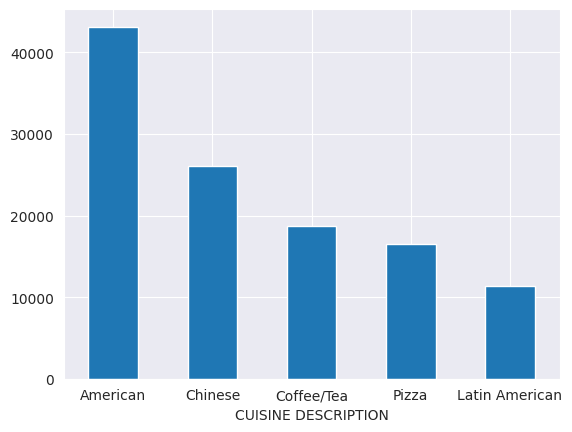

In [25]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
hist_pop=popular[:5].plot(kind='bar', rot=0)


## <a class="anchor"></a> 1.3 Selecting Subsets




To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep

In [26]:
# Create the condition "has mice" for code 04L
mice = restaurants["VIOLATION CODE"] == "04L"
mice.value_counts()


,count
VIOLATION CODE,
False,254601
True,15891


In [27]:
mice.head()

,VIOLATION CODE
0,False
1,False
2,False
3,False
4,False


In [28]:
# Apply the condition to the dataframe "restaurants" and store the result in a dataframe called  has_mice

has_mice = restaurants[mice]
# Similar to the previous line, but using the "loc" method
# has_mice = restaurants.loc[mice]

has_mice.head(10)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
165,41152741,BEACH CAFE,Manhattan,1326,2 AVENUE,10021.0,2129887299,American,2024-09-10,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767391,-73.959379,108.0,5.0,12600.0,1044831.0,1.014440e+09,MN31,NaN
210,41564788,THE LOCAL,Staten Island,310316,MANOR ROAD,NaN,7188166466,American,2022-03-16,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,5.000000e+00,NaN,NaN
304,40363298,CAFE METRO,Manhattan,625,8 AVENUE,10018.0,2127149342,American,2022-08-19,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.756185,-73.990565,104.0,3.0,11500.0,1083268.0,1.010320e+09,MN15,NaN
389,50067314,KABAB KING,Queens,7301,37TH RD,11372.0,7184575857,Pakistani,2023-02-22,Establishment re-closed by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.747154,-73.892274,403.0,25.0,28900.0,4029791.0,4.012840e+09,QN28,NaN
466,50132639,LAS MELECIAS,Brooklyn,237,9 STREET,11215.0,9296035218,Mexican,2024-10-11,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.670573,-73.989164,306.0,39.0,12100.0,3022064.0,3.010030e+09,BK37,NaN
487,50002693,B&W DELI GROCERY,Manhattan,373,west 34th st,10001.0,9173882601,American,2024-08-27,Establishment re-closed by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.752985,-73.995348,104.0,3.0,11100.0,NaN,1.000000e+00,MN13,NaN
645,50066463,Cafe 53,Manhattan,1301,AVE OF TH AMER,NaN,2129746075,American,2023-05-26,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
648,50080121,THE FOREST PARK CAROUSEL,Queens,8300,PARK LANE SOUTH,NaN,9178054375,Hotdogs,2019-08-12,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
944,50128705,THAYER,Manhattan,99,AVENUE B,10009.0,2123713380,Coffee/Tea,2025-01-15,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.724721,-73.981449,103.0,2.0,2602.0,1075858.0,1.003898e+09,MN28,NaN
979,50073073,WILD GINGER VEGAN BJQ,Brooklyn,182,NORTH 10 STREET,11211.0,7182188828,Vegan,2021-09-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.719029,-73.955224,301.0,33.0,51700.0,3399887.0,3.023050e+09,BK73,NaN


In [29]:
has_mice.shape[0]

15891

Now you can list the most frequent DBA values in the data of restaurants that have mice.

In [30]:
has_mice["DBA"].value_counts()[:20].to_frame().rename(columns={"DBA": "DBA count"})



,count
DBA,
SUBWAY,147
DUNKIN,101
GOLDEN KRUST CARIBBEAN BAKERY & GRILL,48
KENNEDY FRIED CHICKEN,47
STARBUCKS,46
DOMINO'S,41
POPEYES,38
CARVEL,36
BURGER KING,33


In [31]:
has_mice[["CAMIS","DBA"]].value_counts()[:10].to_frame().rename(columns={"CAMIS": "CAMIS count"})

,,count
CAMIS,DBA,
50098804,GYRO EXPRESS,9
40395110,PRIMA PASTA & CAFE,8
50106534,MARIE BLACHERE,8
50070366,VILLAGE DINER,8
40609677,BURGER KING,8
50128889,BENI'S RESTAURANT & BAR,7
50079599,NICE ONE BAKERY,7
50100141,FAZEES DELIGHT,7
50105408,DAVIDOVICH BAKERY,7


Here you see that the PRIMA PASTA & CAFE with the CAMIS 40395110 had 8
times mice.

And we can use more complex conditions.

In [32]:
#Restaurants in Brooklyn that have mices
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L")
                    & (restaurants["BORO"] == "Brooklyn") )

has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
466,50132639,LAS MELECIAS,Brooklyn,237,9 STREET,11215.0,9296035218,Mexican,2024-10-11,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.670573,-73.989164,306.0,39.0,12100.0,3022064.0,3.010030e+09,BK37,NaN
979,50073073,WILD GINGER VEGAN BJQ,Brooklyn,182,NORTH 10 STREET,11211.0,7182188828,Vegan,2021-09-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.719029,-73.955224,301.0,33.0,51700.0,3399887.0,3.023050e+09,BK73,NaN
1122,41718673,BAREBURGER,Brooklyn,145149,COURT ST,NaN,3475296673,Hamburgers,2022-03-08,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN
1142,41169770,DUNKIN',Brooklyn,2926,AVENUE I,11210.0,7182525349,Donuts,2024-07-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.629077,-73.947989,314.0,45.0,75000.0,3207035.0,3.075930e+09,BK43,NaN
1477,50066651,NAGOYA FUSION SUSHI,Brooklyn,1907,KINGS HIGHWAY,11229.0,7183363688,Asian/Asian Fusion,2023-02-08,Establishment re-closed by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.610341,-73.954476,315.0,48.0,55000.0,3182508.0,3.067820e+09,BK44,NaN


In [33]:
has_mice_brooklyn["DBA"].value_counts()[:20].to_frame().rename(columns={"DBA": "DBA count"})

,count
DBA,
SUBWAY,16
DUNKIN,16
CROWN FRIED CHICKEN,15
GOLDEN KRUST CARIBBEAN BAKERY & GRILL,14
DOMINO'S,11
STARBUCKS,10
GYRO EXPRESS,9
POPEYES,9
DUNKIN',9


## <a class="anchor"></a> 1.3 Exercice


In [34]:
# Use the .head() function on the "VIOLATION CODE" column from restaurants dataframe
restaurants["VIOLATION CODE"].head()

,VIOLATION CODE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [35]:
# Use the .value_counts() function to count the number of occurences by violation code
violation_counts = restaurants["VIOLATION CODE"].value_counts()


In [36]:
# Have a look at the first 10 values
violation_counts.head(10)

,count
VIOLATION CODE,
10F,37388
08A,27113
06D,17668
02G,16298
10B,16070
04L,15891
06C,15621
02B,13995
04N,11860


<Axes: xlabel='VIOLATION CODE'>

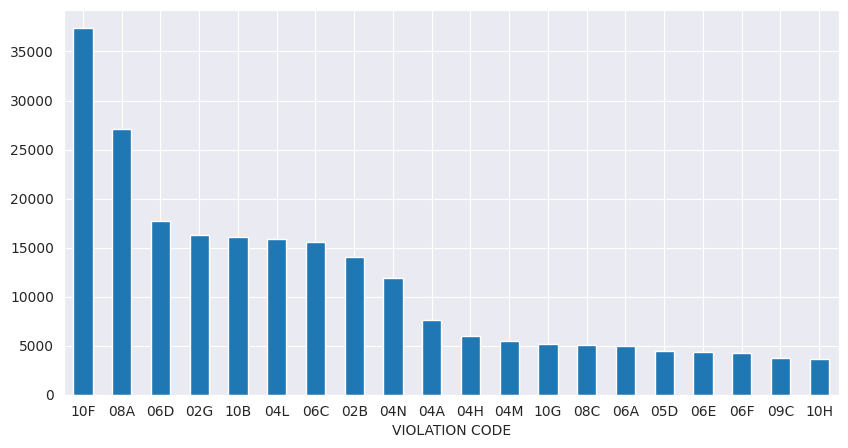

In [37]:
# Plot the 20 violation codes ocurring the most
# HINT : use the function .plot(kind = 'bar')
violation_counts[:20].plot(kind = 'bar', rot=0, figsize = (10,5))

<Axes: ylabel='VIOLATION DESCRIPTION'>

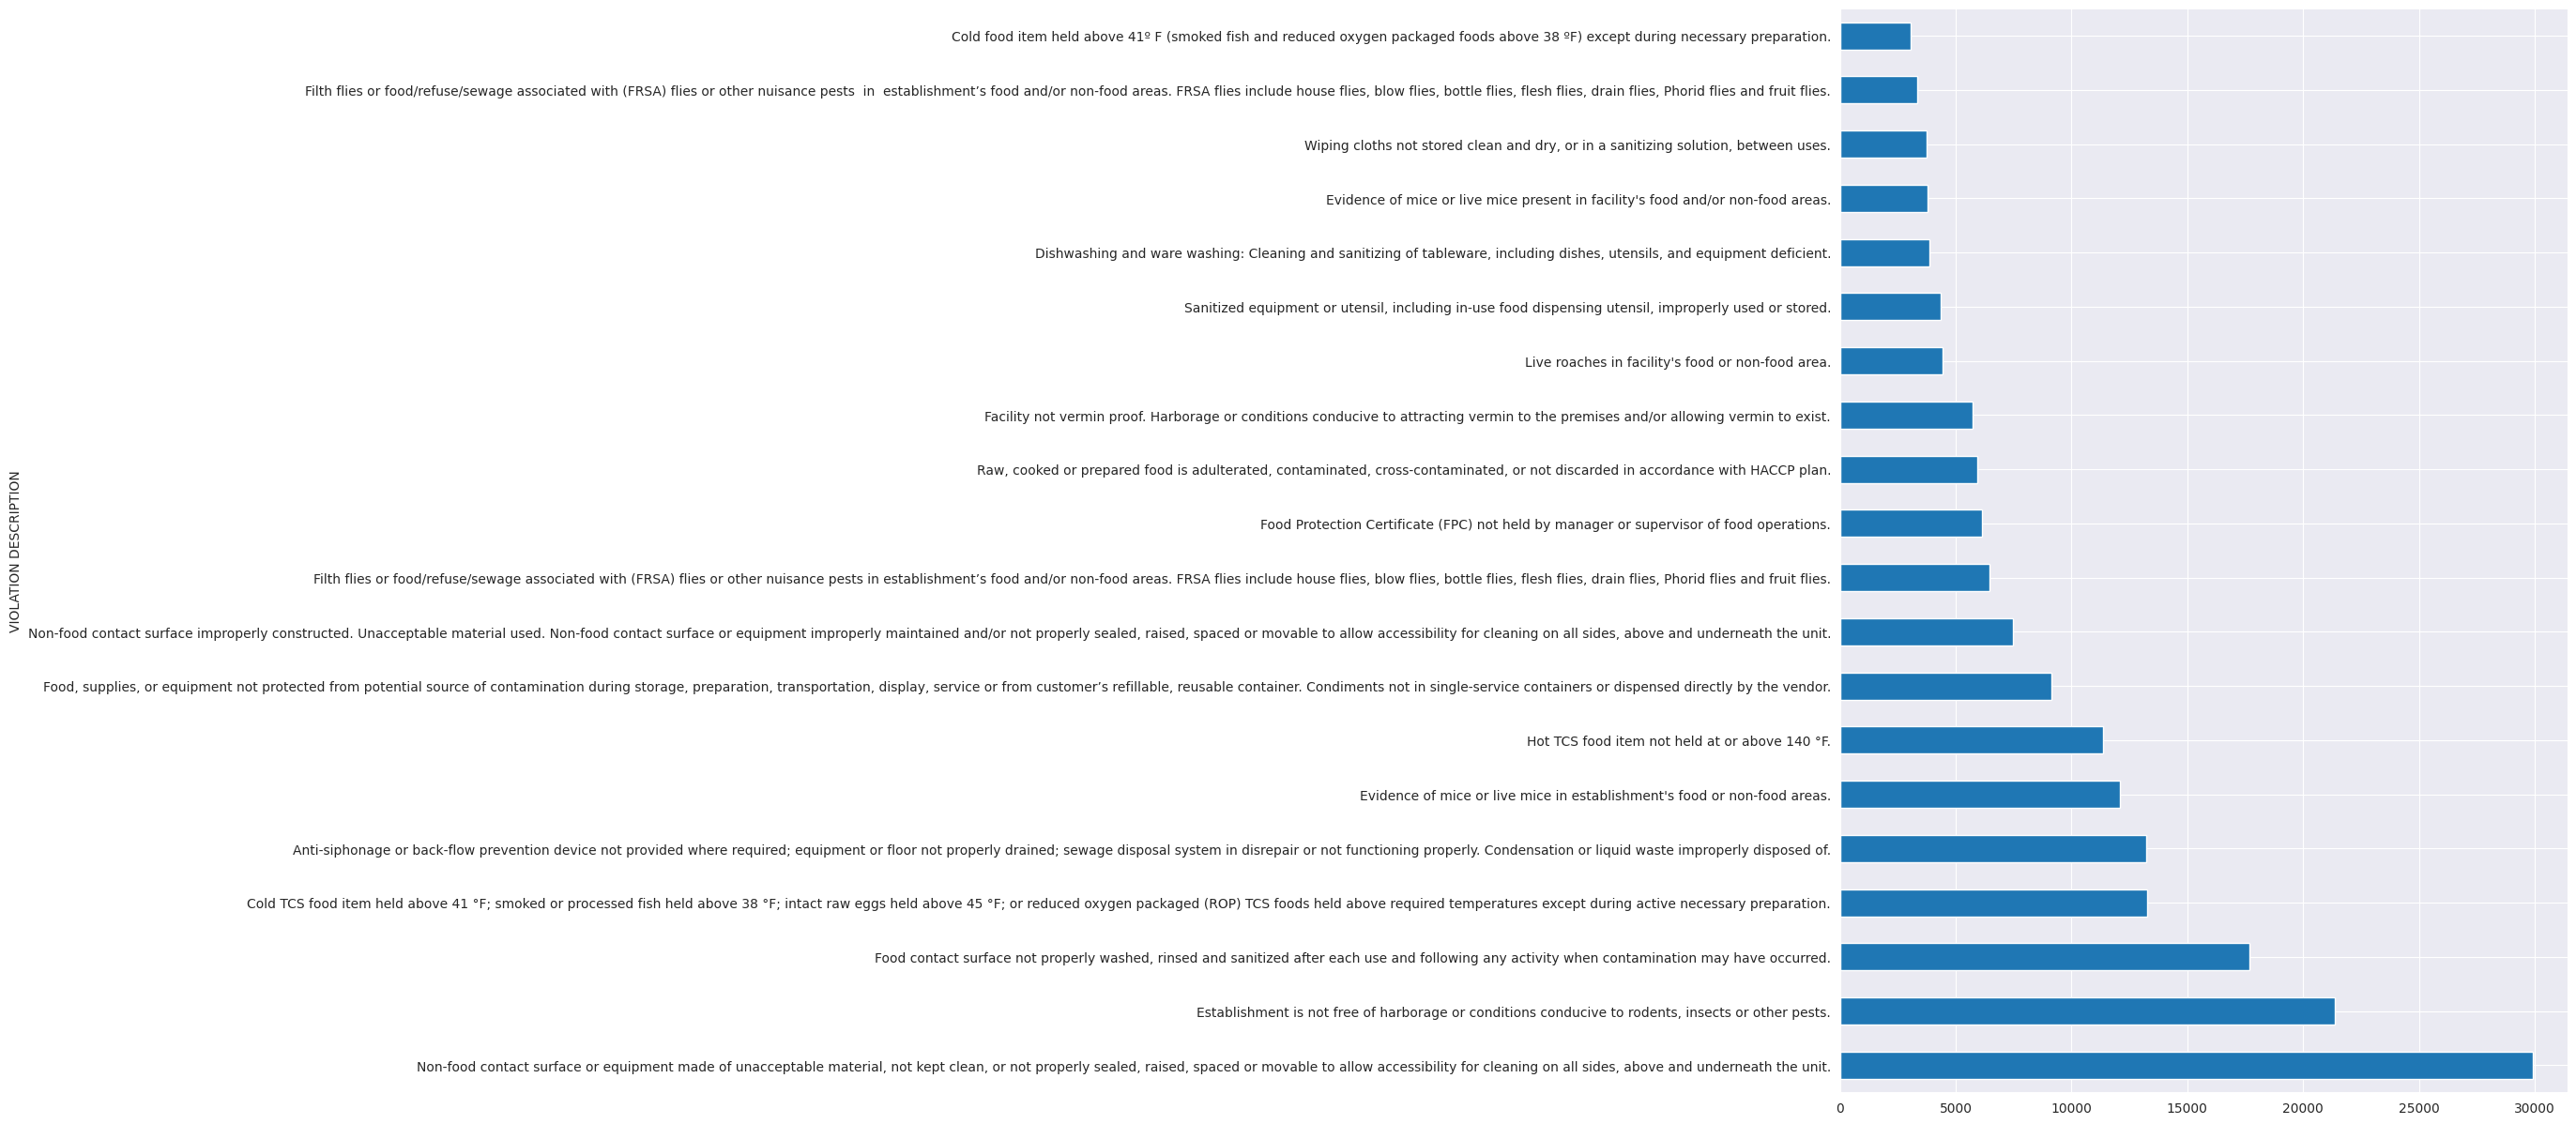

In [38]:
# Do the same but show the description of the violation instead of the code
# HINT: Look at the columns you have in the data frame, you could use .dtypes

violation_counts2 = restaurants["VIOLATION DESCRIPTION"].value_counts()
violation_counts2[:20].plot(kind = 'barh', figsize = (10,15))





## <a class="anchor"></a> 1.4 Missing data

Let's have a look at our missing data. We will write a function which counts the number of missing values per column, and then calculates the percentage of the total values that the missing values represent.


In [39]:
#We store this code as a function in order to use it again later on
def missing_values_calculation():

  #We store the number of missing values for every column
  total = restaurants.isnull().sum().sort_values(ascending=False)

  #We make a new column contaning the percentage of missing values out of the total number of values
  percent = (restaurants.isnull().sum()/restaurants.isnull().count()).sort_values(ascending=False)

  #We now make a DF containing these 2 values
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  #And we print the DataFrame
  display(missing)

#We call the function
missing_values_calculation()

,Total,Percent
Location Point1,270492,1.000000
GRADE,154222,0.570154
GRADE DATE,146836,0.542848
SCORE,14244,0.052660
VIOLATION CODE,5309,0.019627
VIOLATION DESCRIPTION,5309,0.019627
BIN,4680,0.017302
CUISINE DESCRIPTION,3618,0.013376
ACTION,3618,0.013376
INSPECTION TYPE,3618,0.013376


### <a class="anchor"></a> 1.4.1 Dropping columns


The GRADE and GRADE DATE columns containt a lot of missing values (more than half the data is missing).
We may want to drop these 2 columns as the missing data is too much. We can use the `.drop()` function for this, but we need to pass an additional argument to tell Pandas we want to drop a column and not a row. This argument is: `axis = 1`.

Try with and without the argument `inplace=True` and check whether the chage was implemented in the restaurants dataframe or only on a copy.

In [40]:
restaurants.drop(["GRADE", 'GRADE DATE'], axis = 1, inplace = True)
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50160860,BED-VYNE BREW,Brooklyn,370,TOMPKINS AVENUE,11216.0,3472952218,NaN,1900-01-01,NaN,...,NaN,40.684808,-73.944217,303.0,36.0,26700.0,3051686.0,3.018240e+09,BK75,NaN
1,50160153,Idaho,Manhattan,349,EAST 13 STREET,10003.0,3233502345,NaN,1900-01-01,NaN,...,NaN,40.731163,-73.984268,103.0,2.0,4000.0,1006530.0,1.004550e+09,MN22,NaN
2,50160484,BAOBAO SLIDER,Manhattan,W,59TH STREET COLUMBUS CIRCLE,10023.0,6466372137,NaN,1900-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50147778,PICCOLO CUCINA CASA,Brooklyn,141,NEVINS STREET,11217.0,9292950015,NaN,1900-01-01,NaN,...,NaN,40.684310,-73.983847,302.0,33.0,3900.0,3332449.0,3.001970e+09,BK38,NaN
4,50155703,JUST SALAD,Manhattan,300,PARK AVENUE,10022.0,7323004245,NaN,1900-01-01,NaN,...,NaN,40.756795,-73.974271,105.0,4.0,10200.0,1081146.0,1.012850e+09,MN17,NaN


As you can see, the "GRADE" and "GRADE DATE" columns are not a part of our DataFrame anymore.

### <a class="anchor"></a> 1.4.2 Fillna() and dropna()


For the remaining columns we may want to do three different things:
 * Replace the missing entries with a specific value
 * Either estimate a possible value using the median for example
 * Drop the row altogether.

 Remember that we can drop rows with `dropna()`. Another useful function is `fillna()`, this function allows us to replace missing values with a value we may want.

In [41]:
# Replacing missing values with a given value
#In this case we are going to assume that if the value is missing then there was no critical flag
restaurants['Community Board'].fillna("N", inplace = True)

# Replacing missing values with an estimation (median)
median = restaurants['SCORE'].median()
restaurants['SCORE'].fillna(median, inplace=True)

#Dropping the row
restaurants.dropna(subset=['VIOLATION DESCRIPTION'], inplace=True)

#Let's see how many
missing_values_calculation()

,Total,Percent
Location Point1,265183,1.000000
BIN,4468,0.016849
NTA,3175,0.011973
Census Tract,3156,0.011901
Council District,3156,0.011901
ZIPCODE,2674,0.010084
BBL,501,0.001889
Longitude,288,0.001086
Latitude,288,0.001086
BUILDING,282,0.001063


We see that there is now no missing values in most of the columns, even if we didn't change anything in directly in those columns. This is because we dropped rows.

# <a class="anchor"></a> 2 Boxplots and correlations

We will now change datasets. This dataset containts the compensation of the CEO's of different companies.


In [42]:
#Run this cell
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/CEO%20compensation.csv"
data = pd.read_csv(url)
data.head(3) #only shows the first 3 rows

,Total Comp,Top 20,Wide Industry,Company,CEO,City of Birth,State of Birth,Age,Undergrad,UG Degree,...,Bonus,other,St_gains,Comp for 5 yrs,Stock owned,Sales,Profits,Return over 5 yrs,Industry,Industry Code
0,203020000.0,True,Travel,Walt Disney,Mr. Michael D Eisner,New York,NY,52,Denison U,BA,...,NaN,9667.0,202261000.0,236771000.0,0.561,8865,779.5,17.0,Travel-hotelsrecreation,8
1,53110900.0,True,Financial,Travelers,Mr. Sanford I Weill,New York,NY,61,Cornell,BA,...,3030310.0,2161890.0,46900000.0,141605000.0,1.168,6797,950.0,28.0,Financial services-leasefinance,1
2,38675400.0,True,Insurance,Conseco,Mr. Stephen C Hilbert,Terre Haute,IN,48,NaN,NaN,...,8287670.0,190570.0,29947100.0,51156100.0,2.842,2637,308.9,76.0,Insurance-lifehealth,4


In [43]:
# Run this cell to drop the rows where there are missing values
data.dropna(inplace=True)

## <a class="anchor"></a> 2.1 Boxplots

Pandas allows you to plot boxplots with your data. If you do not remember what a Boxplot is you can refresh your memory following this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). Essentially they allow to see the following elements:

* Minimum
* Maximum
* Median
* Quartiles
* Outliers

We will use the `.boxplot()` function to see how much the salaries and bonuses of CEO's can vary. What part of CEO's compensation can vary the most, which one varies the least? Which one has the biggest outliers?



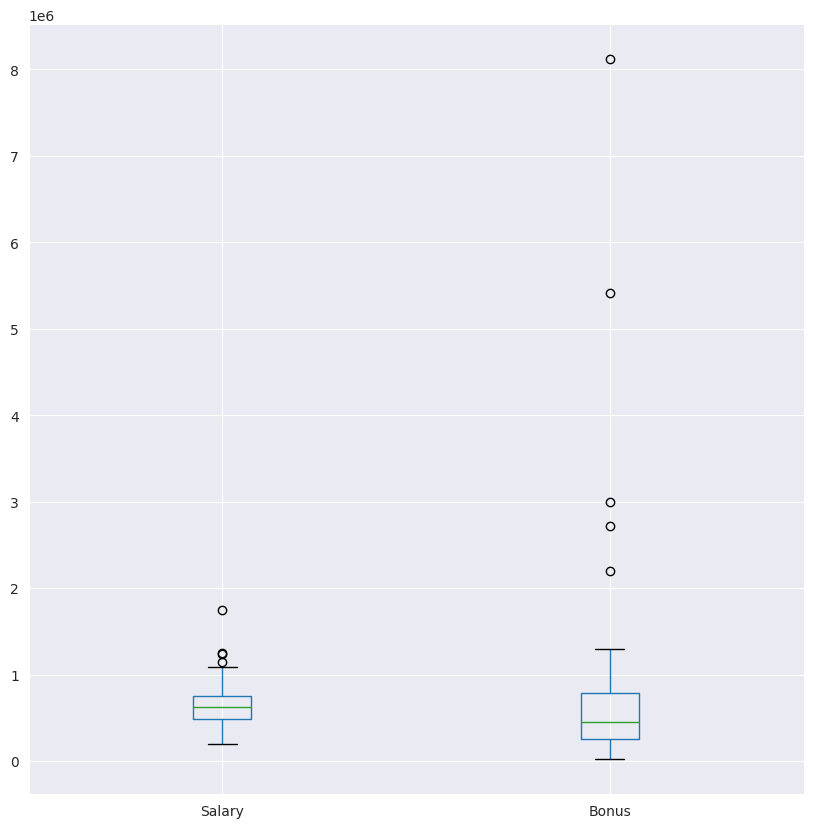

In [59]:
#Boxplot for salaries and bonuses
box_plot=data.boxplot(column = ["Salary", "Bonus"], figsize = (10,10))

### <a class="anchor"></a> 2.1.2 Boxplot exercice

Use the .boxplot function with the "Bonus" column. What is the mean, median, max, min and what are the outlier values?

Subsequentially check your answers using the .describe() function.


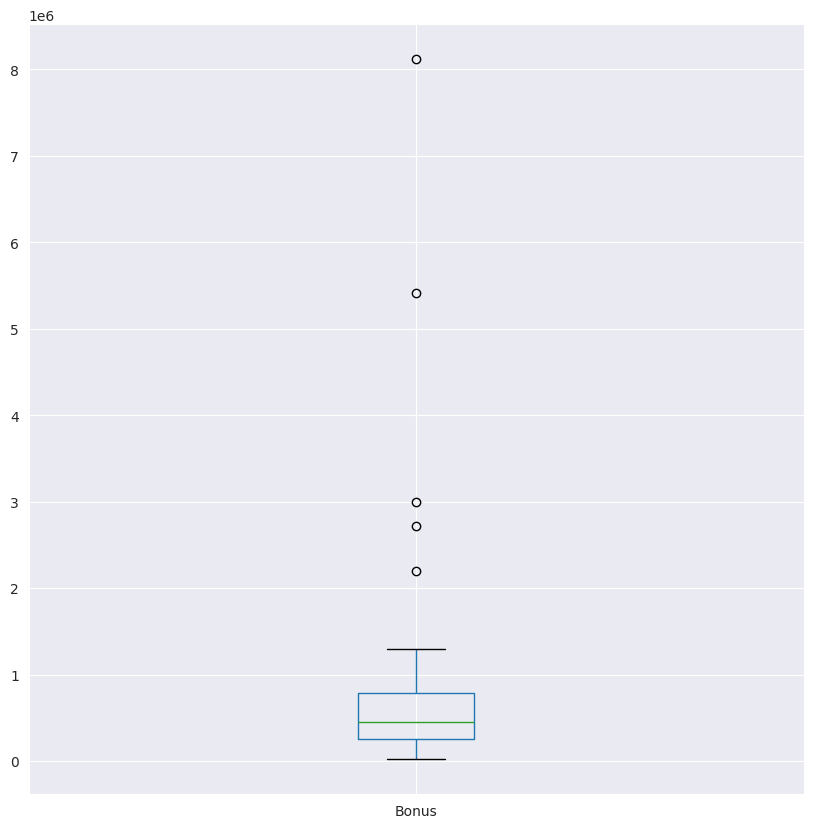

In [60]:
#Generate the Boxplot
#Boxplot for bonuses
box_plot=data.boxplot(column = ["Bonus"], figsize = (10,10))

In [46]:
#Check your answers
data['Bonus'].describe()

,Bonus
count,1.120000e+02
mean,6.789538e+05
std,9.605520e+05
min,1.950000e+04
25%,2.597862e+05
50%,4.562000e+05
75%,7.855315e+05
max,8.115700e+06


## <a class="anchor"></a> 2.1 Scatterplots and Correlation

This plots are useful to find correlations between variables. Let's see if we can find any correlation (visually) between the Age and the Salary of the CEO's.


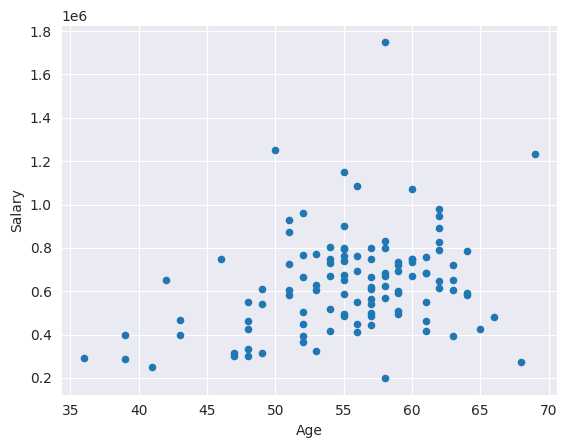

In [47]:
scat = data.plot.scatter(x = "Age", y = "Salary")

Pandas also includes a function `corr` which allows to easily calculate [Pearsons r coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [48]:
data["Age"].corr(data["Salary"])

0.30571805690619325

The correlation seems quite low, so let's see what else we can find.

Usually, as a way to inentivize managers to do a good job, they are given stocks or options. This way, they have an intrinsic motivation to make the stock price grow, as they can benefit enormously from this. Let's see if we can find a correlation between the stock owned by a CEO and the return of the stock in the last 5 years.

Pearson's r coefficient is: 0.66


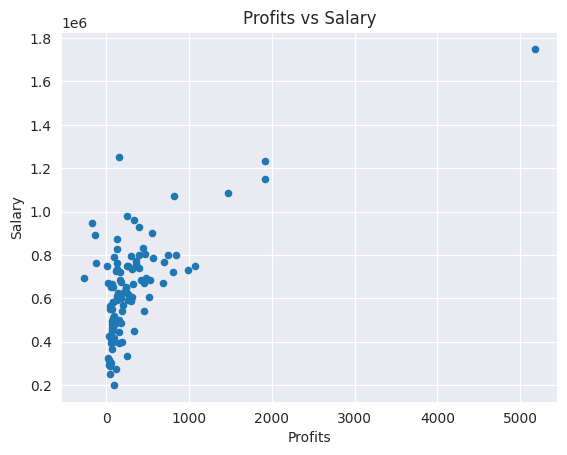

In [49]:
#Scatterplot
profit_cat= data.plot.scatter(x="Profits", y="Salary", title="Profits vs Salary")
#Pearson's r coefficient
print("Pearson's r coefficient is: {}".format(round(data["Profits"].corr(data["Salary"]), 2))) # The 2 stands for the decimals


There seems to be a correlation between the fixed part of a CEO's  compensation and the companies profit, but always remember that correlation does not imply causation.

You can also include a third variable if you want to. In order to plot 3-different variables in 2 dimensions we can use the [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) library and change the collor of the third variable. This is done with the `hue` argument.

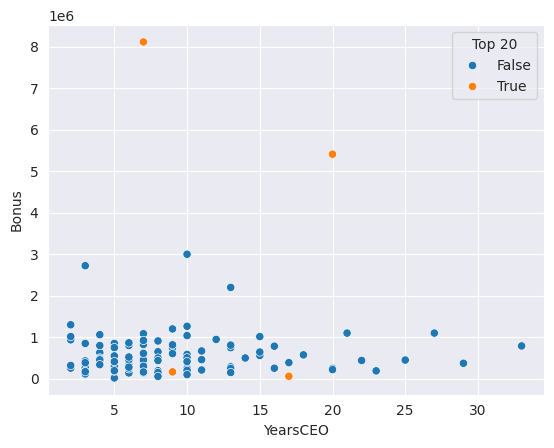

In [50]:
scat2=sns.scatterplot(x=data["YearsCEO"], y=data["Bonus"],hue=data["Top 20"])

## <a class="anchor"></a> 2.2 Exercice

1) Load the dataset from the following url: `https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv`, set ID as the index column and use the .head() funtion to obtain an overview.

In [51]:
birth_data = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv")
birth_data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


2) The above dataset contains information about newborn babis and their mothers. Plot an histogram of the "Gestation" column. What is the mode and the mean of the gestation period?

,Gestation
count,42.000000
mean,39.190476
std,2.643336
min,33.000000
25%,38.000000
50%,39.500000
75%,41.000000
max,45.000000


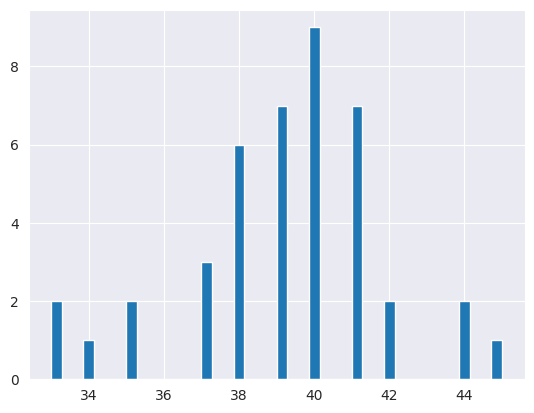

In [52]:
birth_data['Gestation'].hist(bins = 42)
birth_data['Gestation'].describe()



Mean = 39,2
Mode = 40

3) Plot a boxplot of the gestation period. Were you right about the median?

<Axes: >

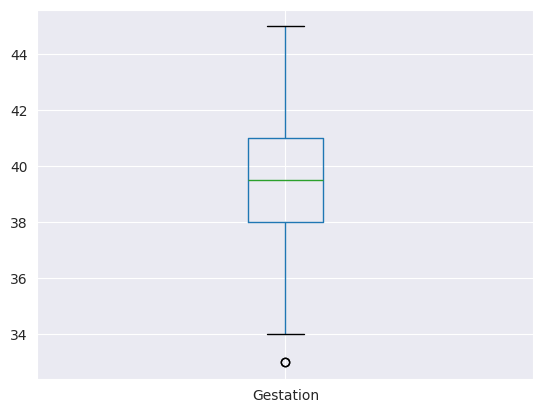

In [53]:
birth_data.boxplot(column='Gestation')

4) It might be interesting to see whether there is a correlation between smoker/ non-smoker mothers and the babies birthweight.

Plot a scatterplot between the "smoker", "Birthweight" and "mage" columns.

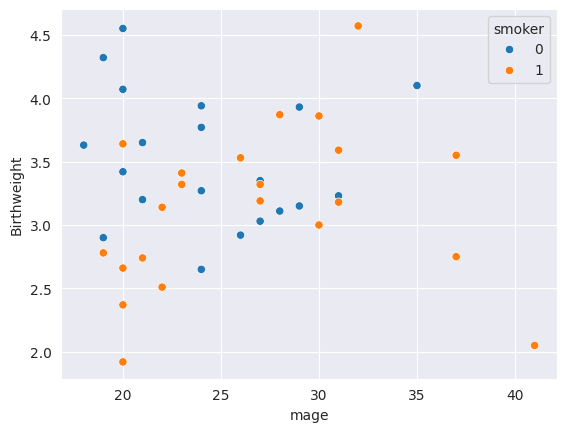

In [54]:
scat2= sns.scatterplot(x=birth_data["mage"], y=birth_data["Birthweight"],hue=birth_data["smoker"])


In [55]:
#Check the correlation between each pair of variables
birth_data['mage'].corr(birth_data['smoker'])

0.21247878626699113

## <a class="anchor"></a> 2.3 Pairgrids and heatmaps

Pairgrids can be a usefool tool to visualize correlations. They allow us to plot the relationships of multiple variables against each other, 2 at a time.


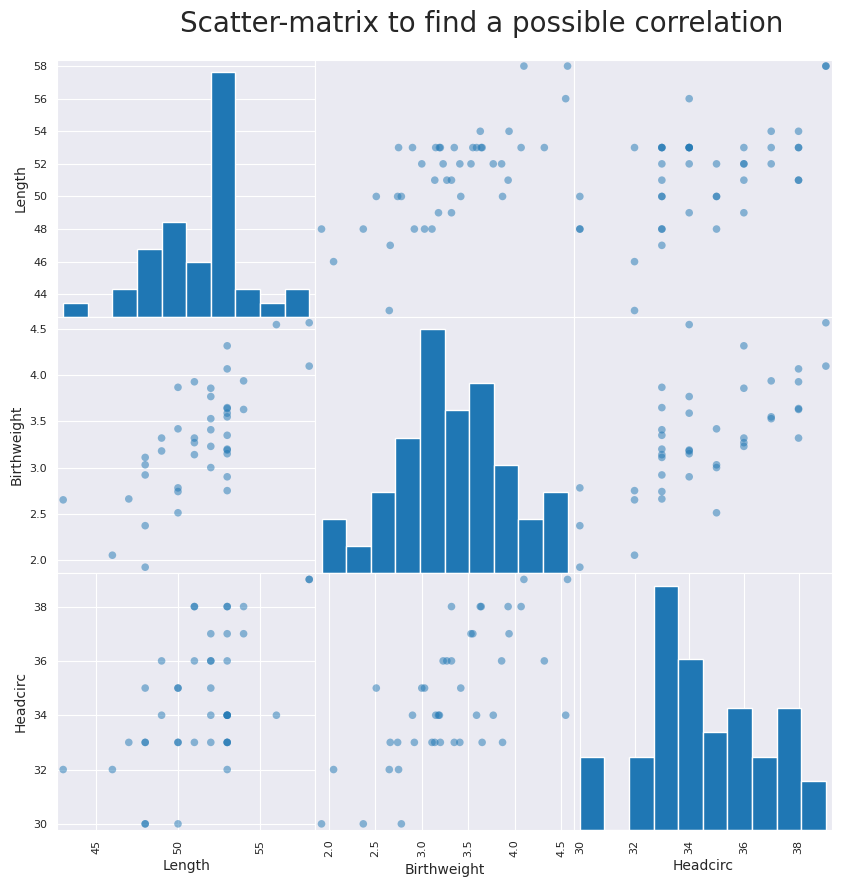

In [56]:
scat3 = scatter_matrix(birth_data[["Length", "Birthweight", "Headcirc"]], figsize=(10, 10), grid=True, s = 120)
plt.suptitle('Scatter-matrix to find a possible correlation', size = 20, y = 0.93, x =0.55)
plt.show()


Another more useful tools are [heatmaps](https://en.wikipedia.org/wiki/Heat_map). By first calculating the correlations between every variable, we can then plot a heatmap of those.


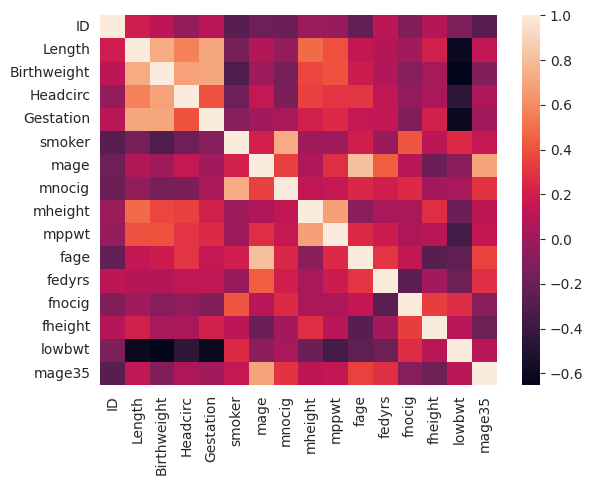

In [57]:
correlations = birth_data.corr()
heatmap=sns.heatmap(correlations)

In [58]:
birth_data.dtypes

,0
ID,int64
Length,int64
Birthweight,float64
Headcirc,int64
Gestation,int64
smoker,int64
mage,int64
mnocig,int64
mheight,int64
mppwt,int64
